In [1]:
#Import packages
import numpy as np
import pandas as pd
import pickle
import networkx as nx 
import osmnx as ox 
import numpy as np 
import seaborn as sns 
import pandas as pd
import networkx as nx
from shapely.geometry import Point, LineString
import pickle
from tqdm import tqdm 
import matplotlib.pyplot as plt

In [3]:
# # Load graph
# with open(r"C:\Users\anton\Desktop\Master-Oppgave\Kode\New_Traffic\data\BaseGraph_E_NOR_wagrades.pickle", 'rb') as file:
#     G = pickle.load(file)

#Load volume dataset
csv_pd=pd.read_csv("/Users/antonglad/Master/road_env/data/volume_data.csv")
csv_pd.drop(columns='Unnamed: 0', inplace=True)
csv_pd.head()

<ipython-input-3-f20e2af7b805>:6: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  csv_pd=pd.read_csv("/Users/antonglad/Master/road_env/data/volume_data.csv")


,id,name,lat,lon,date_from,date_to,volume,heading1,volume_heading1
0,03614V1740869,Tangtunnelen,63.473402,10.905876,2019-12-16,2019-12-17,12071.0,Levanger,6291.0
1,03614V1740869,Tangtunnelen,63.473402,10.905876,2019-12-16,2019-12-17,12071.0,Trondheim,5780.0
2,03614V1740869,Tangtunnelen,63.473402,10.905876,2019-12-17,2019-12-18,17011.0,Levanger,8388.0
3,03614V1740869,Tangtunnelen,63.473402,10.905876,2019-12-17,2019-12-18,17011.0,Trondheim,8623.0
4,03614V1740869,Tangtunnelen,63.473402,10.905876,2019-12-18,2019-12-19,16887.0,Levanger,8372.0


In [4]:
csv_pd_woDup = csv_pd.copy().drop_duplicates('id').reset_index(drop=True)
csv_pd_woDup

,id,name,lat,lon,date_from,date_to,volume,heading1,volume_heading1
0,03614V1740869,Tangtunnelen,63.473402,10.905876,2019-12-16,2019-12-17,12071.0,Levanger,6291.0
1,41379V1201935,MESNADALSARMEN,61.115044,10.456279,2019-01-01,2019-01-02,8429.0,SENTRUM FELT 2,3588.0
2,59115V384472,Tønjum,61.061954,7.512713,2019-04-23,2019-04-24,1619.0,Ljøsne,721.0
3,58853V578623,Flormoen,63.461104,11.372940,2019-07-11,2019-07-12,2926.0,Stjørdal,1490.0
4,27870V384473,Nautavikneset,60.884708,7.154912,2019-04-23,2019-04-24,737.0,Aurland,328.0
...,...,...,...,...,...,...,...,...,...
717,55982V384008,LJØSNE,61.049293,7.594630,2019-01-01,2019-01-02,2872.0,BERGEN,1789.0
718,53385V249032,Elvadalen,62.143426,6.074885,2019-01-01,2019-01-02,4244.0,Ørsta,2291.0
719,60900V248916,Molde fergekai øst,62.737082,7.178031,2019-01-01,2019-01-02,3830.0,Tøndergård,2123.0
720,45383V319532,Haukås,59.347443,5.453745,2019-01-01,2019-01-02,2783.0,Aksdal X E39,1085.0


In [5]:
 # read in the road network graph
with open("/Users/antonglad/Master/road_env/data/BaseGraph_E_NOR_wagrades.pickle", 'rb') as file:
    G = pickle.load(file)

with open("/Users/antonglad/Master/road_env/data/BaseGraph03_NOR_wagrades.pickle", 'rb') as file:
    H = pickle.load(file)


/Users/antonglad/opt/anaconda3/lib/python3.8/site-packages/geopandas/array.py:166: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.from_shapely(data), crs=crs)
/Users/antonglad/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:203: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  segments = [np.array(linestring)[:, :2] for linestring in geoms]
/Users/antonglad/opt/anaconda3/lib/python3.8/site-packages/geopandas/array.py:166: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.from_shapely(data), crs=crs)


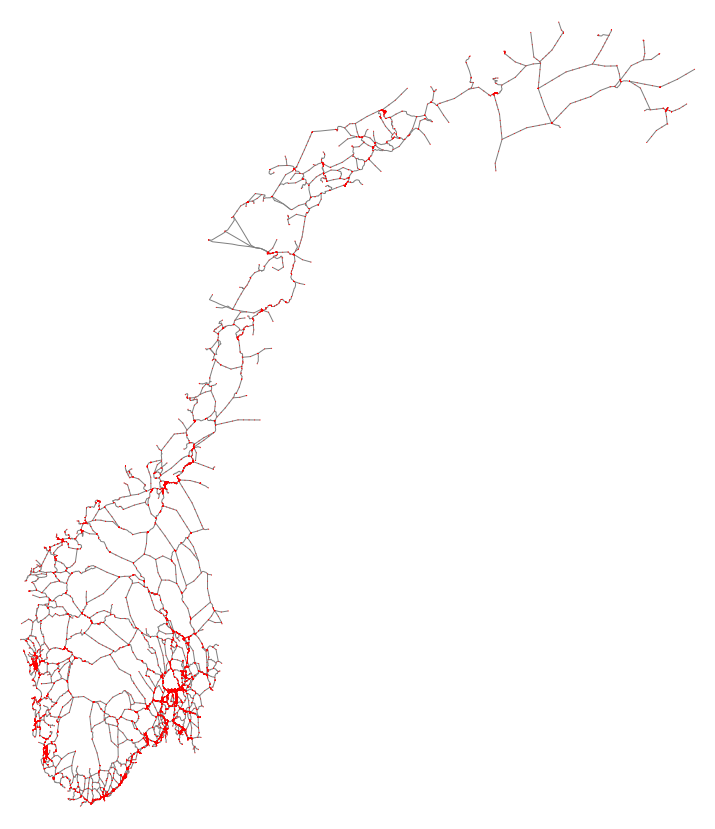

/Users/antonglad/opt/anaconda3/lib/python3.8/site-packages/geopandas/array.py:166: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.from_shapely(data), crs=crs)
/Users/antonglad/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:203: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  segments = [np.array(linestring)[:, :2] for linestring in geoms]
/Users/antonglad/opt/anaconda3/lib/python3.8/site-packages/geopandas/array.py:166: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.from_shapely(data), crs=crs)


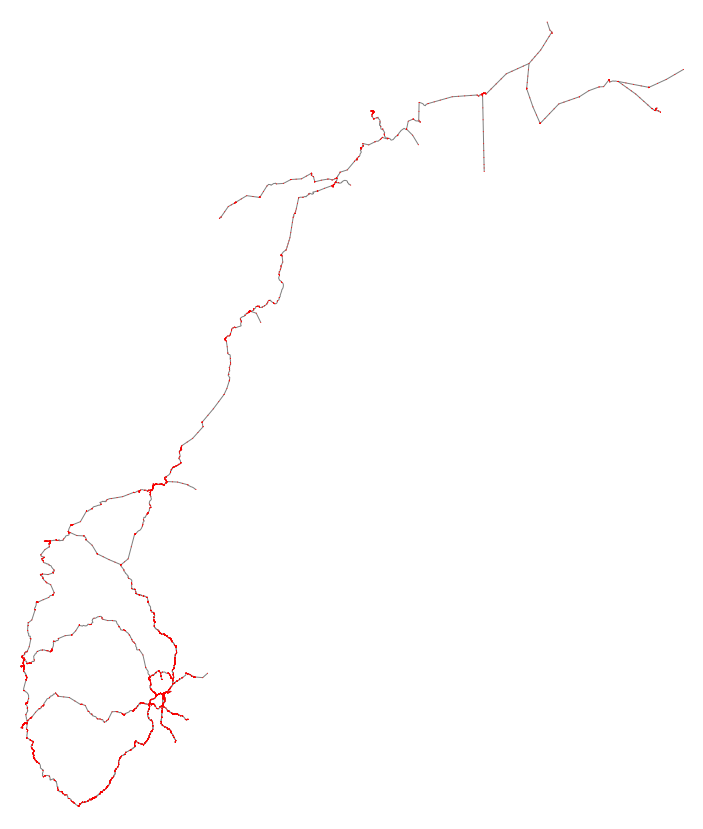

(<Figure size 1080x1080 with 1 Axes>, <AxesSubplot: >)

In [20]:
#Plot graph
ox.plot_graph(H, figsize = (15, 15), node_color="red", edge_color = "gray", bgcolor = "white", node_size=1, edge_linewidth = 1)
ox.plot_graph(G, figsize = (15, 15), node_color="red", edge_color = "gray", bgcolor = "white", node_size=1, edge_linewidth = 1)

In [7]:
# create a dictionary mapping node IDs to (x, y) coordinates
node_coords = {node: (data['x'], data['y']) for node, data in G.nodes(data=True)}

In [9]:
# read in the dataframe with the traffic points
points_df = csv_pd_woDup.copy()
#Remove volume1 and volume2
#points_df=points_df.drop(["volume1", 'volume2', 'month', 'year'], axis="columns")

# convert latitude and longitude columns to shapely Point objects
points_df['geometry'] = points_df.apply(lambda x: Point(x['lon'], x['lat']), axis=1)
print(len(points_df))
points_df

722


/Users/antonglad/opt/anaconda3/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


,id,name,lat,lon,date_from,date_to,volume,heading1,volume_heading1,geometry
0,03614V1740869,Tangtunnelen,63.473402,10.905876,2019-12-16,2019-12-17,12071.0,Levanger,6291.0,POINT (10.905876 63.473402)
1,41379V1201935,MESNADALSARMEN,61.115044,10.456279,2019-01-01,2019-01-02,8429.0,SENTRUM FELT 2,3588.0,POINT (10.456279 61.115044)
2,59115V384472,Tønjum,61.061954,7.512713,2019-04-23,2019-04-24,1619.0,Ljøsne,721.0,POINT (7.512713 61.061954)
3,58853V578623,Flormoen,63.461104,11.372940,2019-07-11,2019-07-12,2926.0,Stjørdal,1490.0,POINT (11.37294 63.461104)
4,27870V384473,Nautavikneset,60.884708,7.154912,2019-04-23,2019-04-24,737.0,Aurland,328.0,POINT (7.154912 60.884708)
...,...,...,...,...,...,...,...,...,...,...
717,55982V384008,LJØSNE,61.049293,7.594630,2019-01-01,2019-01-02,2872.0,BERGEN,1789.0,POINT (7.59463 61.049293)
718,53385V249032,Elvadalen,62.143426,6.074885,2019-01-01,2019-01-02,4244.0,Ørsta,2291.0,POINT (6.074885 62.143426)
719,60900V248916,Molde fergekai øst,62.737082,7.178031,2019-01-01,2019-01-02,3830.0,Tøndergård,2123.0,POINT (7.178031 62.737082)
720,45383V319532,Haukås,59.347443,5.453745,2019-01-01,2019-01-02,2783.0,Aksdal X E39,1085.0,POINT (5.453745 59.347443)


In [10]:
print(len(G.edges))
print(len(G.nodes))

9807
6944


In [ ]:
import networkx as nx
from shapely.geometry import Point

# remove edges with NaN values in the geometry column
#G.remove_edges_from([(u, v) for u, v, d in G.edges(data=True) if d['geometry'] and not d['geometry'].has_z()])
G.remove_edges_from([(u, v) for u, v, d in G.edges(data=True) if d.get('geometry') and not d['geometry'].has_z()])


In [12]:
# loop through each point in the dataframe and find the nearest edge on the road network graph
for idx, row in tqdm(points_df.iterrows(), total=points_df.shape[0]):
# get the shapely Point object for the current traffic point
    point = row['geometry']
    # find the nearest point on the road network graph
    nearest_node = None
    min_distance = float('inf')
    for node in G.nodes:
        # extract (x, y) coordinates from node attributes
        x, y = G.nodes[node]['x'], G.nodes[node]['y']
        node_point = Point(x, y)
        distance = point.distance(node_point)
        if distance < min_distance:
            nearest_node = node
            min_distance = distance
        else:
            pass # May need an additional else-statement which takes account for distance > min_distance
    
    
    # find the closest edge to the nearest point on the road network graph
    nearest_edge = None
    min_edge_distance = float('inf')

    list_minDist = []
    for edge in G.edges:
    # get the coordinates of the nodes in the edge tuple
        node1 = G.nodes[edge[0]]
        node2 = G.nodes[edge[1]]
        coords = [(node1['x'], node1['y']), (node2['x'], node2['y'])]
        # construct a LineString from the coordinates and compute the distance to the point
        edge_distance = point.distance(LineString(coords))

        if edge_distance < min_edge_distance:
            nearest_edge = edge
            min_edge_distance = edge_distance
        else:
            pass

        if min_edge_distance < 50: # adjust the threshold as needed
            list_minDist.append(min_edge_distance)

            # create a dictionary to hold the edge attributes
            edge_attrs = {}

            # update the dictionary with the new 'volume' attribute
            edge_attrs['trafficPoint_ID'] = row['id']

            # update the edge attributes in the graph using the dictionary
            G.edges[nearest_edge].update(edge_attrs)


    # if the distance between the point and the closest point on the edge is below a certain threshold,
    # add the volume data to that edge's attribute in the road network graph
    #if min_distance < 50: # adjust the threshold as needed
    # create a dictionary to hold the edge attributes
        #edge_attrs = {}

        # update the dictionary with the new 'volume' attribute
        #edge_attrs['volume'] = row['volume']

        # update the edge attributes in the graph using the dictionary
        #G.edges[nearest_edge].update(edge_attrs)



100%|██████████| 722/722 [03:44<00:00,  3.22it/s]


In [13]:
print(len(list_minDist))

9807


In [ ]:
# Convert the edge data to a pandas DataFrame
edge_data = G.edges(data=True)
edge_df = pd.DataFrame(edge_data, columns=['source', 'target', 'data_dict'])

# Extract the data into separate columns
edge_df = pd.concat([edge_df.drop('data_dict', axis=1), edge_df['data_dict'].apply(pd.Series)], axis=1)

# Print the resulting DataFrame
edge_df.head()


In [15]:
edge_df['trafficPoint_ID']

0       22331V248904
1       04512V930297
2       22331V248904
3       17549V578615
4       22331V248904
            ...     
9802             NaN
9803             NaN
9804             NaN
9805             NaN
9806    85233V930344
Name: trafficPoint_ID, Length: 9807, dtype: object

In [18]:
# loop through each point in the dataframe and find the nearest edge on the road network graph
for idx, row in tqdm(points_df.iterrows(), total=points_df.shape[0]):
# get the shapely Point object for the current traffic point
    point = row['geometry']
# find the nearest point on the road network graph
    nearest_node = None
    min_distance = float('inf')
    for node in G.nodes:
        # extract (x, y) coordinates from node attributes
        x, y = G.nodes[node]['x'], G.nodes[node]['y']
        node_point = Point(x, y)
        distance = point.distance(node_point)
        if distance < min_distance:
            nearest_node = node
            min_distance = distance
        else:
            pass # May need an additional else-statement which takes account for distance > min_distance
    # find the closest edge to the nearest point on the road network graph
    nearest_edge = None
    min_distance = float('inf')

    for edge in G.edges:
    # get the coordinates of the nodes in the edge tuple
        node1 = G.nodes[edge[0]]
        node2 = G.nodes[edge[1]]
        coords = [(node1['x'], node1['y']), (node2['x'], node2['y'])]

        # construct a LineString from the coordinates and compute the distance to the point
        distance = point.distance(LineString(coords))

        if distance < min_distance:
            nearest_edge = edge
            min_distance = distance
            
    # if the distance between the point and the closest point on the edge is below a certain threshold,
    # add the volume data to that edge's attribute in the road network graph
    if min_distance < 50: # adjust the threshold as needed
    # create a dictionary to hold the edge attributes
        edge_attrs = {}

        # update the dictionary with the new 'volume' attribute
        edge_attrs['trafficPoint_ID'] = row['id']
        edge_attrs['volume'] = row['volume']

        # update the edge attributes in the graph using the dictionary
        G.edges[nearest_edge].update(edge_attrs)


100%|██████████| 722/722 [03:01<00:00,  3.98it/s]


In [19]:
volume_testing=nx.to_pandas_edgelist(G)

volume_testing.to_csv("/Users/antonglad/Master/Connecting_Volume/network_with_volume2.csv", index=False)

/Users/antonglad/opt/anaconda3/lib/python3.8/site-packages/pandas/core/dtypes/cast.py:127: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  arr = construct_1d_object_array_from_listlike(values)


In [ ]:
for edge in G.edges:
    print(edge)

/Users/antonglad/opt/anaconda3/lib/python3.8/site-packages/geopandas/array.py:166: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  return GeometryArray(vectorized.from_shapely(data), crs=crs)
/Users/antonglad/opt/anaconda3/lib/python3.8/site-packages/geopandas/plotting.py:203: ShapelyDeprecationWarning: The array interface is deprecated and will no longer work in Shapely 2.0. Convert the '.coords' to a numpy array instead.
  segments = [np.array(linestring)[:, :2] for linestring in geoms]


<AxesSubplot: >

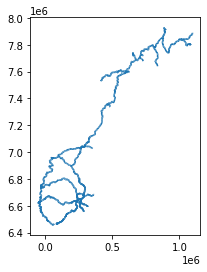

In [24]:
import geopandas as gpd

# Replace "path/to/shapefile.shp" with the path to your shapefile
gdf = gpd.read_file("/Users/antonglad/Master/trafficESRI.shp")

gdf.plot()



In [23]:
import os
os.environ['SHAPE_RESTORE_SHX'] = 'YES'


In [30]:
print(gdf.head(5))
print(gdf.info())

                                            geometry
0  LINESTRING (668361.380 7702363.150, 668357.732...
1  LINESTRING (667831.390 7706861.740, 667824.020...
2  LINESTRING (680206.890 7685496.060, 680205.090...
3  LINESTRING (666180.940 7714320.900, 666180.540...
4  LINESTRING (653121.000 7735041.090, 653113.300...
<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 5675 entries, 0 to 5674
Data columns (total 1 columns):
 #   Column    Non-Null Count  Dtype   
---  ------    --------------  -----   
 0   geometry  5675 non-null   geometry
dtypes: geometry(1)
memory usage: 44.5 KB
None


In [ ]:
gdf.plot(figsize=(20, 20))

gdf.plot(color='red', edgecolor='black', linewidth=0.5)

gdf.plot(figsize=(20, 20))
# Visualize the linestrings, weighted by the 'weight_col' column
gdf.plot(column='adttotal', cmap='viridis', linewidth=2, figsize=(10, 10), legend=True, legend_kwds={'label': "Weight"})

In [34]:
import os
import pickle

# Define the path to the folder you want to save
folder_path = "/Users/antonglad/Master/For_Terence/GeoData_Traffic.gdb"

# Get a list of all the files in the folder
file_list = os.listdir(folder_path)

# Loop through the files in the folder
for file_name in file_list:
    # Create the full path to the file
    file_path = os.path.join(folder_path, file_name)
    # Load the object from the file
    protocol_version = pickle.HIGHEST_PROTOCOL
    while protocol_version >= 0:
        try:
            with open(file_path, 'rb') as f:
                obj = pickle.load(f)
                break
        except (pickle.UnpicklingError, EOFError, ValueError):
            protocol_version -= 1
    # Create a new pickle file with the same name as the original file
    new_file_path = os.path.join(folder_path, file_name + '.pickle')
    # Save the object as a pickle file
    with open(new_file_path, 'wb') as f:
        pickle.dump(obj, f, protocol=protocol_version)


NameError: name 'obj' is not defined

In [35]:
import os
import pickle

# Define the path to the folder you want to save
folder_path = "/Users/antonglad/Master/For_Terence/GeoData_Traffic.gdb"

# Get a list of all the files in the folder
file_list = os.listdir(folder_path)

# Loop through the files in the folder
for file_name in file_list:
    # Create the full path to the file
    file_path = os.path.join(folder_path, file_name)
    # Load the object from the file
    protocol_version = pickle.HIGHEST_PROTOCOL
    obj = None
    while protocol_version >= 0:
        try:
            with open(file_path, 'rb') as f:
                obj = pickle.load(f)
                break
        except (pickle.UnpicklingError, EOFError, ValueError):
            protocol_version -= 1
    # Create a new pickle file with the same name as the original file
    new_file_path = os.path.join(folder_path, file_name + '.pickle')
    # Save the object as a pickle file
    with open(new_file_path, 'wb') as f:
        pickle.dump(obj, f, protocol=protocol_version)


In [ ]:
import arcpy

# Set the input GDB table file path
gdbtable_path = "path/to/gdbtable"

# Set the output CSV file path
csv_path = "path/to/output.csv"

# Use the arcpy.TableToTable_conversion() function to convert the GDB table to a CSV file
arcpy.TableToTable_conversion(gdbtable_path, csv_path, "out.csv")


In [1]:
import geopandas as gpd
import pickle

# Set the input GDB table file path
gdbtable_path = "/Users/antonglad/Master/For_Terence/GeoData_Traffic.gdb/a00000001.gdbtable"

# Use the gpd.read_file() method to read the GDB table into a GeoDataFrame
gdf = gpd.read_file(gdbtable_path)

# Convert the GeoDataFrame to a pickle object
pickle_path = "/Users/antonglad/Master/For_Terence/GeoData_Traffic.gdb/a00000001.gdbtable.pickle"
with open(pickle_path, 'wb') as f:
    pickle.dump(gdf, f)



In [37]:
import pickle

# Load the pickled object from file
with open('/Users/antonglad/Master/For_Terence/GeoData_Traffic.gdb/a00000001.gdbtable.pickle', 'rb') as f:
    obj = pickle.load(f)

# Compare the contents of the pickled object to the original data
with open('/Users/antonglad/Master/For_Terence/GeoData_Traffic.gdb/a00000001.gdbtable', 'r') as f:
    original_data = f.read()

if obj == original_data:
    print("The pickled object contains the correct data from the original file.")
else:
    print("The pickled object does not contain the correct data from the original file.")


UnicodeDecodeError: 'utf-8' codec can't decode byte 0xa0 in position 74: invalid start byte